###    1. Описание структуры исходных данных и задачи в терминах предметной области и машинного обучения

    Задача относится к области сельского хозйства. Данные представляют собой набор характеристик трех различных сортов пшеницы (Kama, Rosa и Canadian) по 70 элементов каждого вида в выборке. Визуализация внутренней структуры зерна была проведена при помощи техники мягкого рентгеновского излучения. Изображения структуры зерен были сохранены на рентгеновские пластины Kodak. Зерна пшеницы были получены с экспериментальных полей Института Агрофизики Польской Академии Наук (г. Люблин).
    

### Формальное описание задачи в терминах машинного обучения

Задачей является: разработать алгоритм классификации зерен пшеницы трех сортов (Kama, Rosa и Canadian) на основе семи параметров измерений зерна.

#### Класс задачи: задача классификации.

#### Исходные прзнаки:

 1. Поверхность (A) 
 2. Периметр (P) 
 3. Компактность (C = 4*pi*A/P^2) 
 4. Длинна зерна 
 5. Ширина зерна 
 6. Коэфициент ассиметрии 
 7. Длинна бороздки зерна
 

#### Целевая переменная

Сорт зерна
1. Cama
2. Rosa
3. Canadian

### 2. Результаты предварительного анализа и визуализации исходных признаков и целевой переменной

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Загрузка данных

In [3]:
df = pd.read_csv("seeds_dataset.txt", sep='\t', header=None)

In [4]:
df.head(10)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,?,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.888,5.884,3.505,1.969,5.533,1


In [5]:
# переименуем названия колонок
df.columns = ["Area", "Perimeter", "Compactness", "Kernel_length",\
              "Kernel_width", "Assimetry", "Groove_length",\
              "Class"]
features = ["Area", "Perimeter", "Compactness", "Kernel_length",\
              "Kernel_width", "Assimetry", "Groove_length"]

In [6]:
df.shape

(210, 8)

In [7]:
# информация по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
Area             210 non-null float64
Perimeter        210 non-null float64
Compactness      210 non-null object
Kernel_length    210 non-null float64
Kernel_width     210 non-null object
Assimetry        210 non-null float64
Groove_length    210 non-null float64
Class            210 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 13.2+ KB


##### Все признаки представленны вещественными переменными
##### Классы: три дискретных класса
##### Тип данных Object в признаках Compactness и Kernel_width наводит на мысль о пропущенных данных (NaN)

In [144]:
df.describe()

,Area,Perimeter,Compactness,Kernel_length,Kernel_width,Assimetry,Groove_length,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,1.001606,5.628533,3.390286,3.700201,5.408071,2.000000
std,2.909699,1.305959,1.086116,0.443063,0.996684,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.857600,5.262250,2.953750,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873950,5.523500,3.258500,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.888225,5.979750,3.573750,4.768750,5.877000,3.000000
max,21.180000,17.250000,10.000000,6.675000,10.000000,8.456000,6.550000,3.000000


##### Некоторые данные в признаках Compactness и Kernel_width заменены на знаки вопроса, найдем и заменим их.

In [8]:
df["Compactness"].value_counts()
# 3 вопроса (1,4%)

0.8823    3
?         3
0.8706    2
0.8977    2
0.8993    2
0.882     2
0.8658    2
0.888     2
0.8811    2
0.8763    2
0.8883    2
0.8726    2
0.8779    2
0.8786    2
0.868     2
0.9077    2
0.8648    2
0.8923    2
0.8849    2
0.8198    2
0.8716    2
0.8558    2
0.859     2
0.8722    2
0.8988    1
0.8829    1
0.8375    1
0.8496    1
0.8567    1
0.8818    1
         ..
0.8604    1
0.8969    1
0.887     1
0.8683    1
0.8866    1
0.8992    1
0.875     1
0.8355    1
0.8744    1
0.8944    1
0.8687    1
0.8698    1
0.8819    1
0.8662    1
0.889     1
0.8852    1
0.8503    1
0.8473    1
0.8641    1
0.8772    1
0.886     1
0.8785    1
0.8831    1
0.8652    1
0.8329    1
0.9064    1
0.8249    1
0.8752    1
0.881     1
0.8696    1
Name: Compactness, Length: 184, dtype: int64

In [9]:
df["Kernel_width"].value_counts()
# 4 вопроса(1,9%)

?        4
3.026    3
2.763    2
3.769    2
3.158    2
3.156    2
3.201    2
2.675    2
2.879    2
2.967    2
3.857    2
3.465    2
3.155    2
3.377    2
3.755    2
2.911    2
3.333    2
3.594    2
2.81     2
3.312    2
2.821    2
2.975    2
3.485    2
3.199    2
2.85     2
3.674    1
3.403    1
3.412    1
2.836    1
2.956    1
        ..
3.464    1
3.242    1
3.379    1
3.681    1
3.419    1
3.486    1
3.684    1
3.991    1
2.717    1
3.049    1
3.815    1
2.648    1
3.462    1
3.07     1
3.693    1
2.974    1
2.882    1
3.562    1
3.683    1
2.989    1
2.897    1
3.119    1
3.073    1
3.288    1
2.71     1
3.065    1
3.507    1
3.771    1
3.566    1
3.639    1
Name: Kernel_width, Length: 182, dtype: int64

In [10]:
df[df["Compactness"] != '?']["Compactness"].value_counts()

0.8823    3
0.8706    2
0.859     2
0.8883    2
0.8658    2
0.8779    2
0.8726    2
0.8786    2
0.868     2
0.8648    2
0.8763    2
0.9077    2
0.882     2
0.8722    2
0.8993    2
0.8558    2
0.8716    2
0.8923    2
0.8811    2
0.888     2
0.8849    2
0.8977    2
0.8198    2
0.8794    1
0.8567    1
0.8988    1
0.8676    1
0.9081    1
0.8416    1
0.8673    1
         ..
0.9066    1
0.8604    1
0.8969    1
0.887     1
0.8683    1
0.8992    1
0.8696    1
0.875     1
0.8944    1
0.8687    1
0.8698    1
0.881     1
0.8563    1
0.8819    1
0.8662    1
0.889     1
0.8852    1
0.8503    1
0.8473    1
0.8641    1
0.8772    1
0.886     1
0.8785    1
0.8831    1
0.8652    1
0.8329    1
0.9064    1
0.8249    1
0.8752    1
0.8866    1
Name: Compactness, Length: 183, dtype: int64

In [11]:
df[df["Kernel_width"] != '?']["Kernel_width"].value_counts()

3.026    3
2.85     2
3.465    2
2.879    2
3.755    2
3.312    2
2.81     2
3.199    2
3.485    2
3.769    2
3.155    2
3.158    2
2.911    2
3.377    2
3.857    2
2.763    2
2.675    2
3.156    2
2.821    2
3.201    2
3.594    2
2.967    2
3.333    2
2.975    2
3.573    1
3.258    1
3.674    1
3.869    1
3.463    1
2.755    1
        ..
3.684    1
3.991    1
2.71     1
3.472    1
3.153    1
2.787    1
3.561    1
3.825    1
3.091    1
3.81     1
3.814    1
3.464    1
2.777    1
3.302    1
3.065    1
3.507    1
3.771    1
3.566    1
2.648    1
3.049    1
2.941    1
2.717    1
2.678    1
3.328    1
3.383    1
3.892    1
3.395    1
3.232    1
3.69     1
3.129    1
Name: Kernel_width, Length: 181, dtype: int64

In [8]:
# значение 10 не встречается в обеих подгруппах, заменим им вопросы.
d = {'?':10}
df[["Compactness", "Kernel_width"]] = df[["Compactness", "Kernel_width"]].\
    replace(d).astype('float')

##### Построим гистограммы исходных признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116f897f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1173091d0>]], dtype=object)

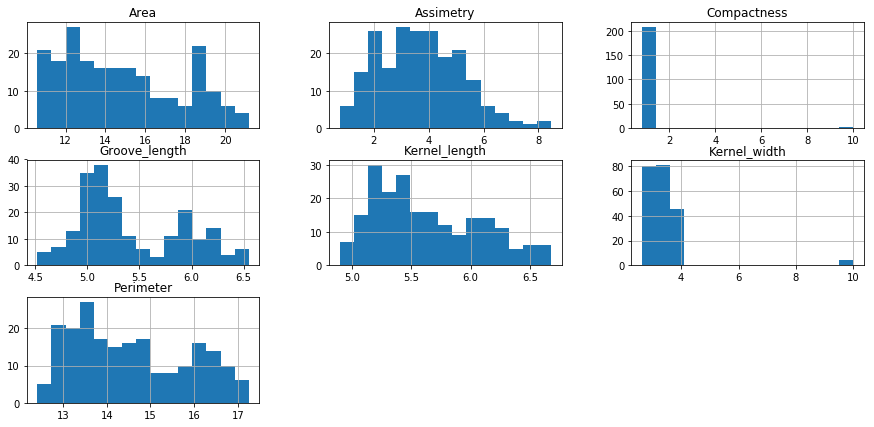

In [9]:
df[features].hist(bins=15, figsize=(15,7))

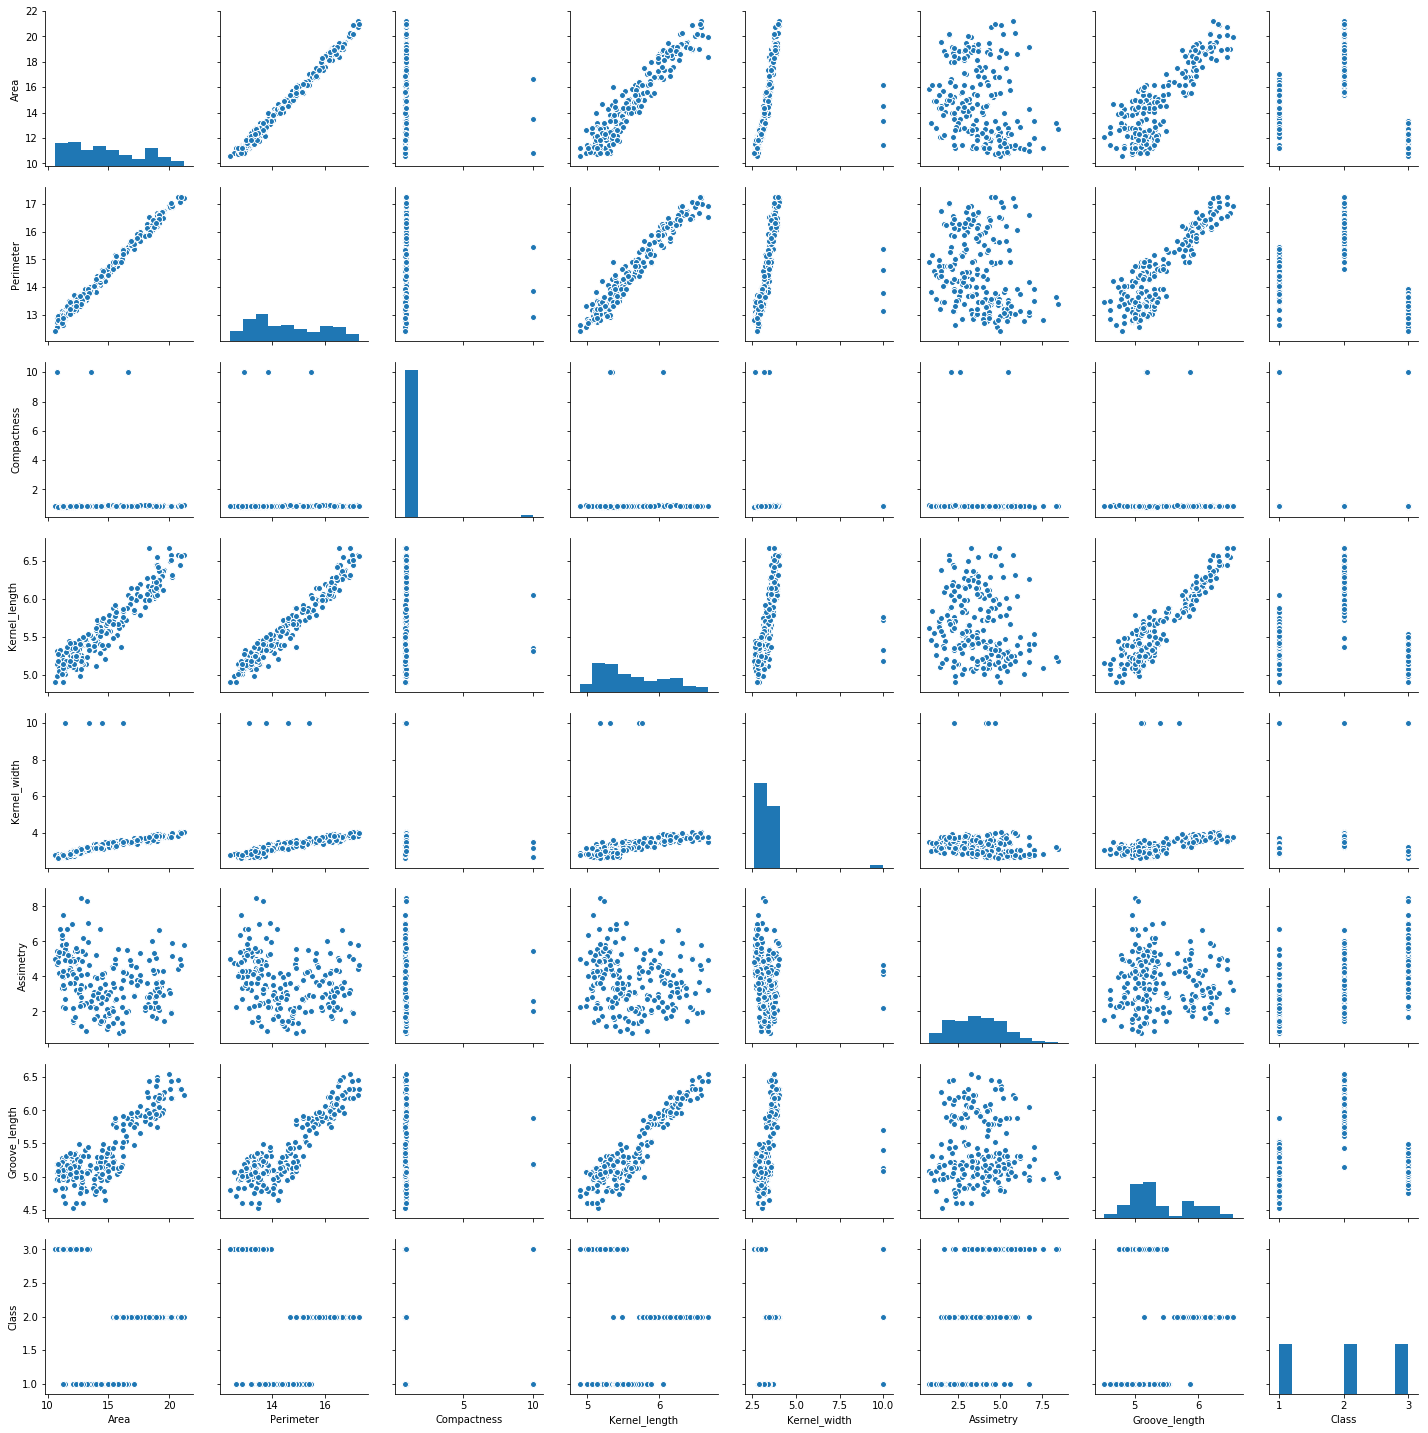

In [10]:
# на вскидку оценим взаимоотношения признаков
sns.pairplot(df) 

### Проанализируем целевую переменную.

In [11]:
df["Class"].describe()

count    210.000000
mean       2.000000
std        0.818448
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Class, dtype: float64

3    70
2    70
1    70
Name: Class, dtype: int64


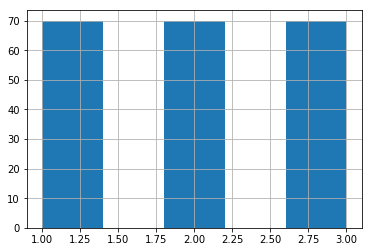

In [12]:
df["Class"].hist(bins=5)
print(df["Class"].value_counts())

##### Классы полностью сбалансированы

### Корреляционный анализ

                   Area  Perimeter  Compactness  Kernel_length  Kernel_width  \
Area           1.000000   0.994341    -0.036631       0.949985      0.320455   
Perimeter      0.994341   1.000000    -0.033068       0.972422      0.321358   
Compactness   -0.036631  -0.033068     1.000000      -0.007366     -0.031957   
Kernel_length  0.949985   0.972422    -0.007366       1.000000      0.283415   
Kernel_width   0.320455   0.321358    -0.031957       0.283415      1.000000   
Assimetry     -0.229572  -0.217340    -0.033887      -0.171562     -0.089385   
Groove_length  0.863693   0.890784     0.006865       0.932806      0.261221   
Class         -0.346058  -0.327900    -0.060259      -0.257269     -0.117862   

               Assimetry  Groove_length     Class  
Area           -0.229572       0.863693 -0.346058  
Perimeter      -0.217340       0.890784 -0.327900  
Compactness    -0.033887       0.006865 -0.060259  
Kernel_length  -0.171562       0.932806 -0.257269  
Kernel_width   -0.0

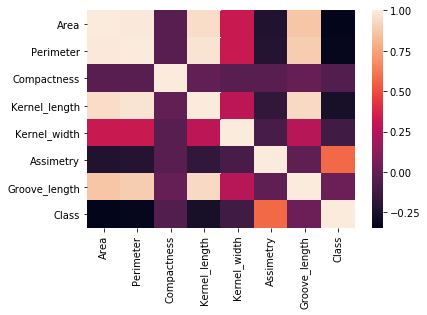

In [13]:
print(df.corr())
sns.heatmap(df.corr())

##### Площадь, периметр, длина зерна и длина бороздки имееют прямую зависимость

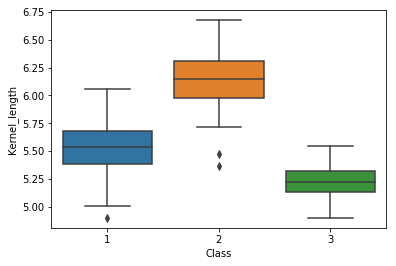

In [14]:
sns.boxplot(x="Class", y="Kernel_length", data=df[["Class","Kernel_length"]],\
           orient='v')

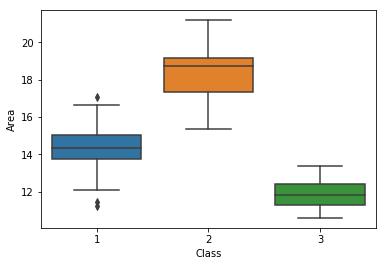

In [15]:
sns.boxplot(x="Class", y="Area", data=df[["Class","Area"]],orient='v')

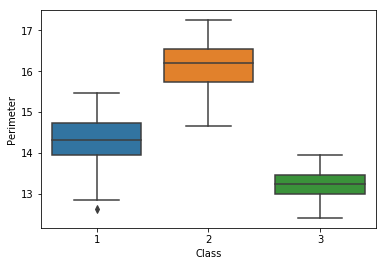

In [16]:
sns.boxplot(x="Class", y="Perimeter", data=df[["Class","Perimeter"]],orient='v')

##### Площадь, периметр и длина зерна лучше всего делят данные на классы

## 3. Подготовка данных

In [17]:
X = df[features]
y = df['Class']

## 4. Обучение и тестирование моделей

In [18]:
random_state = 11

### Критерии расщепления

In [19]:
criteria = ['gini', 'entropy']

for cr in criteria:
    clf = DecisionTreeClassifier(criterion=cr, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=5)
    print('Criterion: {}, accuracy score: {}'.format(cr, scores.mean()))

Criterion: gini, accuracy score: 0.8952380952380953
Criterion: entropy, accuracy score: 0.9142857142857143


##### Результаты не очень высокие, лучший критерий - энтропия

### Количество признаков (max_features)

In [20]:
max_features = list(range(2, 8))

for mf in max_features:
    clf = DecisionTreeClassifier(criterion="entropy",\
                                 random_state=random_state,\
                                max_features=mf)
    scores = cross_val_score(clf, X, y, cv=5)
    print('Max_features: {}, accuracy score: {}'.format(mf, scores.mean()))

Max_features: 2, accuracy score: 0.8571428571428573
Max_features: 3, accuracy score: 0.8761904761904763
Max_features: 4, accuracy score: 0.8952380952380953
Max_features: 5, accuracy score: 0.8952380952380953
Max_features: 6, accuracy score: 0.8761904761904761
Max_features: 7, accuracy score: 0.9142857142857143


##### Лучший результат при использовании всех признаков. Оптимально = 7

### Глубина дерева (max_depth)

Max_depth: 2, accuracy score: 0.8904761904761905
Max_depth: 3, accuracy score: 0.8761904761904761
Max_depth: 4, accuracy score: 0.8809523809523808
Max_depth: 5, accuracy score: 0.9
Max_depth: 6, accuracy score: 0.9095238095238095
Max_depth: 7, accuracy score: 0.9142857142857143
Max_depth: 8, accuracy score: 0.9142857142857143
Max_depth: 9, accuracy score: 0.9142857142857143
Max_depth: 10, accuracy score: 0.9142857142857143
Max_depth: 11, accuracy score: 0.9142857142857143
Max_depth: 12, accuracy score: 0.9142857142857143
Max_depth: 13, accuracy score: 0.9142857142857143
Max_depth: 14, accuracy score: 0.9142857142857143
Max_depth: 15, accuracy score: 0.9142857142857143
Max_depth: 16, accuracy score: 0.9142857142857143
Max_depth: 17, accuracy score: 0.9142857142857143
Max_depth: 18, accuracy score: 0.9142857142857143
Max_depth: 19, accuracy score: 0.9142857142857143


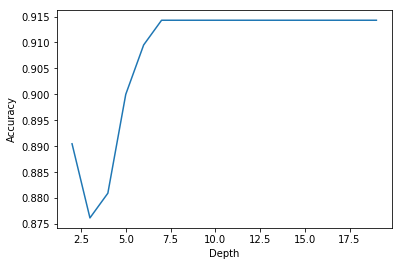

In [21]:
max_depth = list(range(2,20))
scoring = []

for md in max_depth:
    clf = DecisionTreeClassifier(criterion="entropy",\
                                 random_state=random_state, max_depth=md)
    scores = cross_val_score(clf, X, y, cv=5)
    scoring.append(scores.mean())
    print("Max_depth: {}, accuracy score: {}".format(md, scores.mean()))
    
plt.plot(max_depth, scoring)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

Оптимальная глубина = 7

# 5. Визуализация ДР

In [22]:
from sklearn.tree import export_graphviz

for depth in [3,7]:
    clf = DecisionTreeClassifier(criterion='entropy', max_features=7, max_depth=depth, random_state=random_state)
    clf.fit(X, y)
    export_graphviz(clf, out_file='tree{}.dot'.format(depth))

In [23]:
!dot -Tpng tree3.dot -o tree3.png
!dot -Tpng tree7.dot -o tree7.png

/bin/sh: dot: command not found
/bin/sh: dot: command not found


#### Сравним еще и с методом логистической регрессии, которая должна оптимально подходить для наших данных

In [24]:
# logistic regression
lr_clf = LogisticRegressionCV(cv=5, penalty='l1', solver="liblinear", class_weight="balanced",\
                              random_state=random_state)

In [25]:
model = lr_clf.fit(X, y)

In [26]:
model.score(X,y)

0.98571428571428577

In [27]:
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.9571428571428573

## Выводы

Проведен анализ задачи классификации и решение ее с использованием метода машинного обучения деревья решений.
Входные данные (признаки) полностью числовые с минимальными пропусками в данных (не более 2%).
При первичном анализе выделены признаки, которые оптимально делили данные на классы (площадь, периметр и длина зерна).
Проведено пробное построение деревьев решений с использованием различных параметров. Лучший результат показало дерево,
в котором использованы следующие параметры: критерий - энтропия, максимальной число признаков - 7, максимальная глубина дерева - 7.
При выбранных параметрах достигнута точность классификации - 0.914.
Кроме деревьев решений для сравнения использован метод решения задач классификации: логистическая регрессия. Этот метод был выбран с учетом картины входящих данных (небольшое количество признаков и тип принаков - вещественные). Со стандартными методами оптимизации и регуляризации достигнута высокая точность классификации - 0.957.